In [1]:
import numpy as np
import pandas as pd
import math 
import random as rn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.0,9.0)

In [33]:
data=pd.read_csv('./iris.csv')

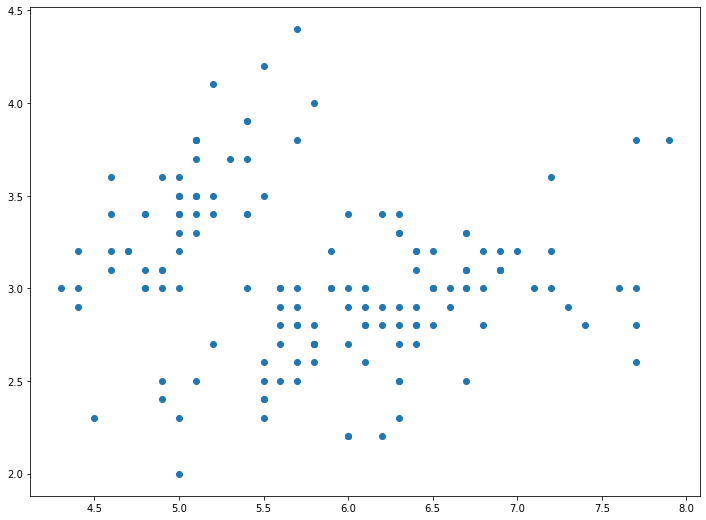

In [34]:
X=data.iloc[:,0]
Y=data.iloc[:,1]
plt.scatter(X,Y)
plt.show()

In [35]:
m=0
c=0
L=0.0001
epochs=1000
n=float(len(X))
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.4955476520876827 0.0962144146070432


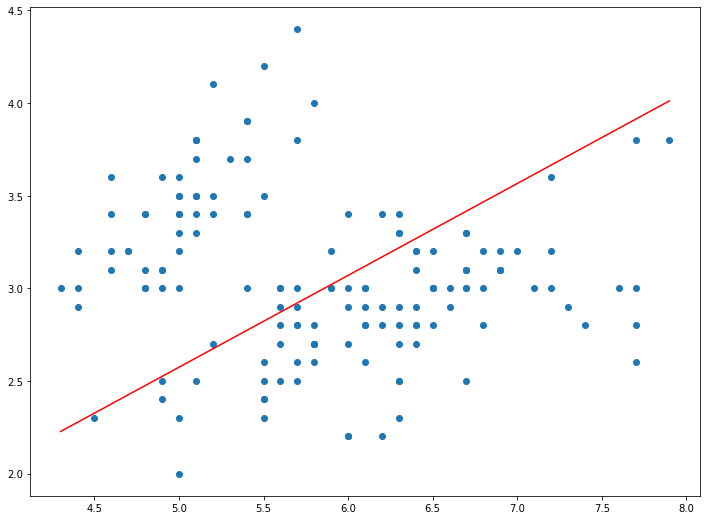

In [36]:
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [55]:
df = pd.read_csv('./iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [78]:
X = df.iloc[0:100, [1, 2]].values

y = df.iloc[0:100,4 ].values

y = np.where(y == 'Iris-setosa', 1, 0)

In [79]:
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

In [80]:
def sigmoid(X, theta):
    
    z = np.dot(X, theta[1:]) + theta[0]
    
    return 1.0 / ( 1.0 + np.exp(-z))

In [81]:
def lrCostFunction(y, hx):
  
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    
    return j

In [82]:
def lrGradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        
        cost.append(lrCostFunction(y, hx))
        
    return cost        
        

In [83]:

# m = Number of training examples
# n = number of features
m, n = X.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.01
num_iter = 500

cost = lrGradient(X_std, y, theta, alpha, num_iter)

Text(0.5, 1.0, 'Logistic Regression')

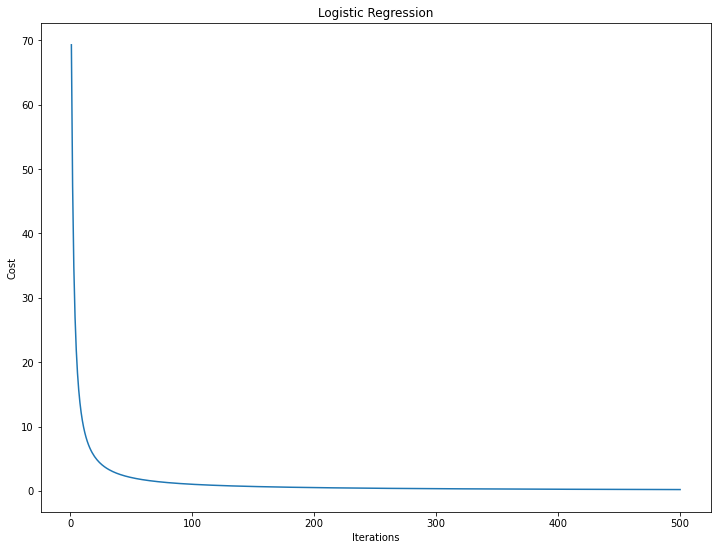

In [84]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

In [85]:
# print theta paramters 
print ('\n Logisitc Regression bias(intercept) term :', theta[0])
print ('\n Logisitc Regression estimated coefficients :', theta[1:])


 Logisitc Regression bias(intercept) term : -6.209811040519238

 Logisitc Regression estimated coefficients : [-6.38924677e-16 -2.24802815e-16]
